<p style="font-size:11px;"><em><strong>Créditos</strong>: El contenido de este cuaderno ha sido tomado de varias fuentes, pero especialmente de <a href="https://github.com/Mark-Kramer/Case-Studies-Python/blob/master/09.ipynb">Mar Kramer</a> y <a href="https://stats.oarc.ucla.edu/r/dae/poisson-regression/">UCLA</a>. El compilador se disculpa por cualquier omisión involuntaria y estaría encantado de agregar un reconocimiento.</em></p>

# Modelos Lineales Generalizados (GML)

Los Modelos Lineales Generalizados (GLM) son una extensión de los modelos lineales clásicos (como la regresión lineal) que permiten modelar una variedad más amplia de tipos de datos, incluyendo aquellos que no siguen una distribución normal. Estos modelos son especialmente útiles cuando la variable dependiente sigue una distribución distinta, como una distribución binomial (en el caso de variables de respuesta dicotómicas), una distribución de Poisson (para conteos), o una distribución gamma (para variables continuas positivas).

Un GLM está compuesto por tres elementos esenciales:

* Función de enlace (𝑔(⋅)): Establece la relación entre la media de la variable dependiente 𝑌 y los predictores lineales.

* Distribución de la variable dependiente: La variable dependiente 𝑌 sigue una distribución dentro de la familia exponencial (por ejemplo, normal, binomial, Poisson, etc.).

* Predictores lineales: La relación entre los predictores 𝑋1,𝑋2,…,𝑋𝑝 y la variable dependiente se describe mediante una combinación lineal de los mismos.

La forma general de un GLM se puede expresar como:

$
g(\mathbb{E}[Y_i]) = \beta_0 + \beta_1 X_{i1} + \beta_2 X_{i2} + \dots + \beta_p X_{ip}
$

Donde:
* 𝑌𝑖 es la variable dependiente para la 𝑖-ésima observación.
* 𝑔(𝐸[𝑌𝑖]) es la función de enlace aplicada a la esperanza de 𝑌𝑖.
* 𝛽0 es el intercepto y 𝛽1,𝛽2,…𝛽𝑝 son los coeficientes de los predictores 𝑋1,𝑋2,…,𝑋𝑝.
* 𝑔(⋅) es la función de enlace, que transforma la media de 𝑌𝑖 en un valor que tiene una forma lineal respecto a los predictores.

Dependiendo del tipo de variable dependiente, se utilizan diferentes distribuciones dentro de la familia exponencial:

## Modelo de Regresión Logística

La regresión logística es un modelo lineal generalizado (GLM, por sus siglas en inglés) utilizado para modelar variables respuesta binarias. A diferencia de la regresión lineal clásica, donde la variable dependiente es continua, en la regresión logística la respuesta 𝑌 toma únicamente dos valores posibles, usualmente codificados como 0 y 1. Este método es ampliamente utilizado en análisis de eventos geoespaciales, como la ocurrencia o no de deslizamientos, incendios, inundaciones, entre otros.

Mientras la regresión binomial modela proporciones o conteos de éxitos en un número fijo de ensayos 𝑛, la regresión logística corresponde a un caso especial del modelo binomial con 𝑛=1.

La función de distribución acumulada de la distribución logística está definida como:

$$
F(x; \mu, s) = \frac{1}{1 + \exp\left(-\frac{x - \mu}{s}\right)}
$$

donde:

- $( x \in \mathbb{R})$ es la variable aleatoria continua,
- $( \mu \in \mathbb{R})$ es el parámetro de **ubicación** (media y punto de inflexión),
- $( s > 0 )$ es el parámetro de **escala**, que determina la pendiente o dispersión de la curva.

Esta función tiene forma de sigmoide y es la base del modelo de regresión logística. El valor de $( F(x; \mu, s) )$ representa la probabilidad acumulada hasta el punto $( x )$.


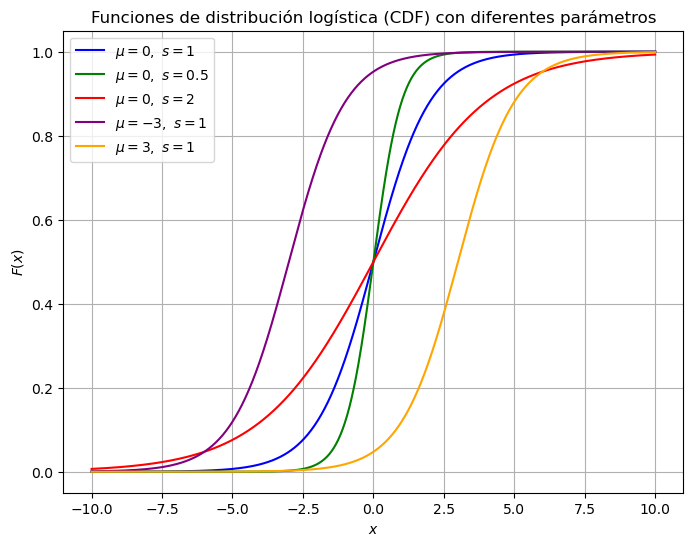

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import logistic

# Rango de valores de x
x = np.linspace(-10, 10, 1000)

# Conjuntos de parámetros (mu, s)
param_sets = [
    (0, 1),     # estándar
    (0, 0.5),   # más empinada
    (0, 2),     # más dispersa
    (-3, 1),    # desplazada a la izquierda
    (3, 1),     # desplazada a la derecha
]

# Colores para la visualización
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Graficar CDF para cada conjunto de parámetros
plt.figure(figsize=(8, 6))
for (mu, s), color in zip(param_sets, colors):
    y = logistic.cdf(x, loc=mu, scale=s)
    plt.plot(x, y, label=f'$\mu={mu},\ s={s}$', color=color)

plt.title("Funciones de distribución logística (CDF) con diferentes parámetros")
plt.xlabel("$x$")
plt.ylabel("$F(x)$")
plt.legend()
plt.grid(True)
plt.show()


Cuando 𝑠 disminuye (por ejemplo,𝑠=0.5), la curva se vuelve más empinada: los cambios en 𝑥 producen variaciones más abruptas en la probabilidad.

Cuando 𝑠 aumenta (por ejemplo, 𝑠=2), la curva se aplana: los cambios en 𝑥 tienen menor impacto inmediato en la probabilidad.

Cuando 𝜇 se desplaza (por ejemplo, 𝜇=−3 o 𝜇=3), se mueve el punto de inflexión de la sigmoide hacia la izquierda o derecha, sin cambiar la forma de la curva.

Sea $Y_i \in \{0,1\}$ una variable aleatoria binaria que representa la ocurrencia de un evento en la unidad $i$.

Se modela la probabilidad condicional $\pi_i = \mathbb{P}(Y_i = 1 \mid \mathbf{x}_i)$ como:

$$
\pi_i = \frac{1}{1 + \exp(-\eta_i)} = \text{logit}^{-1}(\eta_i)
$$

donde el predictor lineal es:

$$
\eta_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_p x_{ip} = \mathbf{x}_i^\top \boldsymbol{\beta}
$$

y la función de enlace logit es:

$$
\text{logit}(\pi_i) = \log\left(\frac{\pi_i}{1 - \pi_i}\right) = \eta_i
$$

El modelo asume una distribución Bernoulli para la respuesta:

$$
Y_i \sim \text{Bernoulli}(\pi_i)
$$

La función log-verosimilitud para los $n$ datos observados es:

$$
\ell(\boldsymbol{\beta}) = \sum_{i=1}^{n} \left[ y_i \log(\pi_i) + (1 - y_i)\log(1 - \pi_i) \right]
$$

donde $\pi_i = \frac{1}{1 + \exp(-\mathbf{x}_i^\top \boldsymbol{\beta})}$.

Cada coeficiente 𝛽𝑗 se interpreta como el cambio en el logit (log-odds) de la probabilidad de éxito por unidad de incremento en 𝑥𝑗, manteniendo las demás variables constantes. Alternativamente, exp(𝛽𝑗) representa el odds ratio, es decir, el factor multiplicativo en las probabilidades al incrementar en una unidad 
𝑥𝑗.
$$
\frac{\partial \log\left( \frac{\pi_i}{1 - \pi_i} \right)}{\partial x_j} = \beta_j
$$

Y el **odds ratio** se obtiene como:

$$
\text{OR}_j = \exp(\beta_j)
$$

Como ventajas se tiene:

* Flexibilidad: Permite modelar probabilidades entre 0 y 1 mediante una función sigmoide.
* Interpretabilidad: Los odds ratios son intuitivos y útiles para la toma de decisiones.
* Ampliamente implementado: Disponible en casi todos los lenguajes estadísticos (R, Python, STATA, etc.).
* Generalizable: Es un caso particular del marco de los modelos lineales generalizados, lo que permite su extensión a modelos multivariados, espaciales y jerárquicos.

Como desventajas se registran:

* No modela directamente la probabilidad si hay correlación espacial o temporal, lo cual puede llevar a errores de inferencia.
* Sensibilidad a valores atípicos: Aunque más robusta que la regresión lineal, sigue siendo afectada por outliers en las covariables.
* Supone independencia: No es adecuada si hay dependencia espacial o temporal entre las observaciones, lo cual es común en datos geoespaciales.
* Relación lineal en el logit: Si la relación real no es lineal en el logit, el modelo puede no ajustarse bien.

Sin embargo, debido a la naturaleza espacial de estos fenómenos, es frecuente combinar la regresión logística con modelos que incorporen autocorrelación espacial (como modelos SAR o CAR) o adoptar enfoques de regresión geográficamente ponderada o modelos jerárquicos bayesianos.


### Ejemplo con Statsmodels
Simulamos una variable binaria y como respuesta a dos covariables x1 (continua) y x2 (binaria).

In [5]:
import statsmodels.api as sm
import pandas as pd
np.random.seed(0)
n = 500

# Covariables
x1 = np.random.normal(0, 1, n)
x2 = np.random.binomial(1, 0.5, n)

# Coeficientes verdaderos
beta_0 = -0.5
beta_1 = 2.0
beta_2 = -1.0

# Probabilidad con función logística
lin_pred = beta_0 + beta_1 * x1 + beta_2 * x2
p = 1 / (1 + np.exp(-lin_pred))

# Variable respuesta binaria
y = np.random.binomial(1, p)

# DataFrame
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})


In [6]:
# Agregar constante
X = sm.add_constant(df[['x1', 'x2']])  # añade la constante (intercepto)
y = df['y']

# Ajuste del modelo
modelo = sm.Logit(y, X).fit()

print(modelo.summary())


Optimization terminated successfully.
         Current function value: 0.456092
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  500
Model:                          Logit   Df Residuals:                      497
Method:                           MLE   Df Model:                            2
Date:                Sun, 11 May 2025   Pseudo R-squ.:                  0.2995
Time:                        14:32:18   Log-Likelihood:                -228.05
converged:                       True   LL-Null:                       -325.54
Covariance Type:            nonrobust   LLR p-value:                 4.555e-43
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2504      0.153     -1.638      0.101      -0.550       0.049
x1             1.6643      0.

| Elemento                  | Interpretación |
|--------------------------|----------------|
| `Dep. Variable`          | Variable dependiente modelada (respuesta binaria, por ejemplo, `y`). |
| `No. Observations`       | Número total de observaciones utilizadas para ajustar el modelo. |
| `Model`                  | Tipo de modelo ajustado, en este caso `Logit`, que indica una regresión logística. |
| `Method`                 | Método de estimación utilizado, típicamente `MLE` (Máxima Verosimilitud). |
| `Df Residuals`           | Grados de libertad residuales: número de observaciones menos el número de parámetros estimados. |
| `Df Model`               | Grados de libertad del modelo: número de predictores (sin incluir la constante). |
| `Pseudo R-squ.`          | Pseudo-R², una medida del poder explicativo del modelo. No debe interpretarse como un R² clásico, pero valores más altos indican mejor ajuste relativo. |
| `Log-Likelihood`         | Logaritmo de la verosimilitud del modelo ajustado; más cercano a cero es mejor. |
| `LL-Null`                | Log-verosimilitud del modelo nulo (modelo sin predictores, solo constante). |
| `LLR p-value`            | Valor p del test de razón de verosimilitud. Evalúa si el modelo completo mejora significativamente con respecto al modelo nulo. Un valor pequeño (p < 0.05) indica que el modelo es estadísticamente significativo. |
| `converged`              | Indica si el proceso de optimización numérica del modelo ha convergido correctamente. |

---

La siguiente tabla presenta los parámetros estimados para el modelo logístico:

| Columna        | Interpretación |
|----------------|----------------|
| `coef`         | Estimación del coeficiente $( \beta_j )$. Representa el cambio en el **logit** (logaritmo del odds) de la variable respuesta por cada unidad de cambio en la covariable correspondiente. |
| `std err`      | Error estándar de la estimación del coeficiente. Se usa para construir intervalos de confianza y calcular el estadístico z. |
| `z`            | Estadístico z, calculado como $( \beta_j / \text{SE} )$. Sirve para evaluar la significancia del coeficiente bajo la hipótesis nula $( H_0: \beta_j = 0 )$. |
| `P>|z|`        | Valor p asociado al estadístico z. Un valor pequeño (por ejemplo, menor a 0.05) indica que el coeficiente es estadísticamente significativo. |
| `[0.025  0.975]` | Intervalo de confianza del 95% para el coeficiente $( \beta_j )$. Si el intervalo no contiene cero, se considera que el coeficiente es estadísticamente significativo. |

---

- Si $( \beta_j > 0 )$: A mayor valor de la covariable $( x_j )$, aumenta el **log-odds** de que la variable dependiente sea 1.
- Si $( \beta_j < 0 )$: A mayor valor de $( x_j )$, disminuye el log-odds de éxito.
- Para obtener el **odds ratio**, se aplica: $[\text{OR}_j = \exp(\beta_j)]$  
  Este valor representa cuánto se multiplica el odds por cada unidad adicional de $( x_j )$, manteniendo constante el resto de covariables.

---


x1 = 2.0542: Por cada unidad adicional en x1, el log-odds de que 𝑦=1 aumenta en 2.05. Es decir, el odds se multiplica por exp(2.0542)≈7.8.

x2 = -1.0762: Si x2 pasa de 0 a 1 (es binaria), el log-odds de éxito disminuye en 1.08. El odds se reduce por un factor de exp⁡(−1.0762)≈0.34.

El valor LLR p-value: 3.591e-60 indica que el modelo con predictores explica significativamente más que el modelo nulo. Esto es evidencia a favor del modelo propuesto.

### Ejemplo con Sklearn

In [8]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score


Simulamos dos covariables 𝑥1 y 𝑥2, y una respuesta binaria 𝑦 con base en un modelo logístico.

In [10]:
np.random.seed(42)
n = 1000

# Variables predictoras
x1 = np.random.normal(loc=0, scale=1, size=n)
x2 = np.random.normal(loc=2, scale=1.5, size=n)

# Coeficientes reales
beta_0 = -1
beta_1 = 2.0
beta_2 = -1.5

# Lineal predictor
eta = beta_0 + beta_1 * x1 + beta_2 * x2

# Probabilidad con función logística
p = 1 / (1 + np.exp(-eta))

# Variable binaria (respuesta)
y = np.random.binomial(1, p)

# Crear DataFrame
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})


In [11]:
# Modelo logístico
model = LogisticRegression()
model.fit(df[['x1', 'x2']], df['y'])

# Coeficientes estimados
print("Intercepto:", model.intercept_)
print("Coeficientes:", model.coef_)


Intercepto: [-1.27875569]
Coeficientes: [[ 2.19160475 -1.4779385 ]]


In [12]:
# Predicciones
y_pred = model.predict(df[['x1', 'x2']])
y_prob = model.predict_proba(df[['x1', 'x2']])[:,1] #probabilidad del si

Matriz de confusión:
[[866  17]
 [ 53  64]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       883
           1       0.79      0.55      0.65       117

    accuracy                           0.93      1000
   macro avg       0.87      0.76      0.80      1000
weighted avg       0.92      0.93      0.92      1000



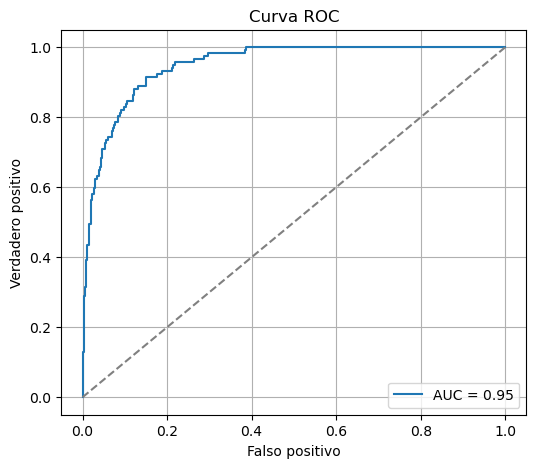

In [13]:
# Matriz de confusión
print("Matriz de confusión:")
print(confusion_matrix(df['y'], y_pred))

# Métricas
print("\nReporte de clasificación:")
print(classification_report(df['y'], y_pred))

# AUC y curva ROC
fpr, tpr, thresholds = roc_curve(df['y'], y_prob)
auc = roc_auc_score(df['y'], y_prob)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0,1], [0,1], '--', color='gray')
plt.xlabel('Falso positivo')
plt.ylabel('Verdadero positivo')
plt.title('Curva ROC')
plt.legend()
plt.grid(True)
plt.show()

## Modelo de Poisson
La distribución de Poisson se utiliza debido a su adecuación para modelar datos de conteo no negativos ($𝑌_𝑖$=0,1,2,…) y su relación con procesos que cuentan la ocurrencia de eventos en el espacio. La distribución de Poisson describe la probabilidad de que un número de eventos $𝑌_𝑖$ ocurra en un intervalo de tiempo o una región espacial dada, si esos eventos suceden con una tasa constante $𝜆_𝑖$:

$$
P(Y_i = y_i) = \frac{\lambda_i^{y_i} e^{-\lambda_i}}{y_i!}, \quad y_i = 0, 1, 2, \ldots
$$

donde: $𝜆_𝑖$: tasa o intensidad esperada del número de eventos en la región, $𝑖$, $𝑦_𝑖$: número observado de eventos en la región $𝑖$.

Los Modelos Lineales Generalizados (GLM) son modelos en los que las variables de respuesta siguen una distribución distinta a la distribución normal. El modelo lineal generalizado de Poisson se especifica de la siguiente manera:

$$
\lambda_i = \mathbb{E}[Y_i] = e^{\eta_i}
$$

donde:

$$
\eta_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip}
$$

y $𝜂_𝑖$ es la parte lineal del modelo que depende de las covariables $𝑥_{𝑖j}$ y de los parámetros $𝛽_𝑗$ (para $𝑗=0,1,…,𝑝$. En los modelos de Regresión de Poisson, las variables predictoras o explicativas pueden ser una mezcla de valores numéricos o categóricos.

En el modelo de Poisson, la función de enlace que relaciona la media $𝜆_𝑖$ con la parte lineal $𝜂_𝑖$ es el logaritmo natural. Es decir, la función de enlace es:

$$
\eta_i = \log(\lambda_i)
$$

De esta forma, la media de la distribución de Poisson se relaciona exponencialmente con la combinación lineal de las covariables:

$$
\lambda_i = e^{\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip}}
$$

Esta forma asegura que la intensidad $𝜆_𝑖$ siempre será positiva, como es necesario en una distribución de Poisson.

Los coeficientes se calculan utilizando métodos como la Estimación de Máxima Verosimilitud (MLE) o la cuasi-verosimilitud máxima.

La distribución de Poisson puede ser considerada como el límite de una distribución binomial. La distribución binomial modela el número de éxitos en un número fijo de ensayos independientes. Si el número de ensayos es muy grande, pero la probabilidad de éxito en cada ensayo es muy baja (es decir, si los eventos son raros), la distribución de Poisson resulta ser una muy buena aproximación para modelar el número total de éxitos. Mientras que la distribución de Poisson se usa, entonces, para modelar situaciones en las que estamos contando eventos raros que ocurren a lo largo de un intervalo (de tiempo, espacio, etc.). Por ejemplo, la cantidad de accidentes de tráfico en un cruce por día, o el número de llamadas que llegan a un centro de emergencias por minuto.

En el contexto de un modelo de Poisson, como los Modelos Lineales Generalizados de Poisson (GLM de Poisson) para análisis espacial, los términos **sobredispersión** y **subdispersión** se refieren a la relación entre la varianza y la media de los datos observados, y cómo esta relación se ajusta a las expectativas de la distribución de Poisson. Estos conceptos son cruciales porque la distribución de Poisson tiene una característica específica: la media y la varianza son iguales. Sin embargo, en la práctica, los datos espaciales frecuentemente presentan patrones que difieren de esta suposición, lo que da lugar a la sobredispersión o la subdispersión.

En un modelo de Poisson, la media y la varianza están directamente relacionadas de la siguiente manera:

Si $𝑌_𝑖$ sigue una distribución de Poisson con media $𝜆_𝑖$:

$$
Var(𝑌_𝑖)=𝐸[𝑌_𝑖]=𝜆_𝑖​
$$

Es decir, la varianza y la media son iguales. Esta propiedad, sin embargo, no siempre se cumple cuando se modelan datos reales, especialmente en datos espaciales.

La sobredispersión ocurre cuando la varianza de los datos es mayor que la media. Es decir, los datos muestran más variabilidad de la que el modelo de Poisson predice. La sobredispersión indica que el modelo subestima la variabilidad en los datos. Puede ser causada por factores no observados que afectan el proceso, creando clústeres o patrones espaciales. Por ejemplo, si se modela el número de deslizamientos en una región, pero existen factores locales que varían significativamente dentro de la región (como el tipo de suelo o las prácticas de manejo del terreno), la variabilidad observada en los deslizamientos será mayor que la predicha por la simple distribución de Poisson.
Los modelos de Poisson no pueden manejar adecuadamente este tipo de situación porque asumen una relación 1:1 entre la media y la varianza. Cuando hay sobredispersión, el modelo suele producir errores estándar subestimados, lo que puede llevar a test estadísticos incorrectos y a la identificación de relaciones significativas falsas. Una opción común para manejar la sobredispersión es utilizar un modelo de binomial negativo. Este modelo introduce un parámetro adicional que permite ajustar la varianza de manera independiente de la media.

La subdispersión ocurre cuando la varianza de los datos es menor que la media. En este caso, los datos presentan menos variabilidad de la que la distribución de Poisson predice. La subdispersión es menos común que la sobredispersión en la práctica, pero puede ocurrir en ciertos contextos donde los eventos están altamente regulados o tienen un patrón regular.
Un ejemplo podría ser el número de árboles plantados siguiendo un esquema regular en una región o una situación en la que la influencia espacial está restringida, causando que los eventos ocurran de manera muy controlada y menos variable. Manejar la subdispersión es menos común, pero se puede utilizar una reformulación del modelo que considere una menor variabilidad. Esto implica ajustar la especificación del modelo, por ejemplo, restringiendo el rango de valores posibles para las observaciones. También se podrían utilizar modelos como la regresión cuasi-Poisson, donde se ajusta la varianza independientemente de la media para modelar la subdispersión.

El proceso de puntos de Poisson a veces se llama proceso puramente o completamente aleatorio. Este proceso tiene la propiedad de que el número de eventos $N(A)$ en una región acotada $A \in \mathbb{R}^d$ está distribuido de manera independiente y uniforme sobre $A$. Esto significa que la ubicación de un punto no afecta las probabilidades de que otros puntos aparezcan cerca y que no hay regiones donde los eventos sean más propensos a aparecer.

Si un proceso de puntos de Poisson tiene un parámetro constante, digamos, $\lambda$, entonces se llama proceso de **Poisson homogéneo (o estacionario) (HPP)**. El parámetro $\lambda$, llamado intensidad, está relacionado con el número esperado (o promedio) de puntos de Poisson que existen en alguna región acotada. El parámetro $\lambda$ se puede interpretar como el número promedio de puntos por alguna unidad de longitud, área o volumen, dependiendo del espacio matemático subyacente, por lo que a veces se llama densidad media.

El HPP es estacionario y los patrones y procesos de puntos espaciales son isotrópicos. Es estacionario porque la intensidad es constante y, además, es isotrópico porque la intensidad es invariante a la rotación de $\mathbb{R}^d$.

Una generalización del HPP que permite una intensidad no constante $\lambda$ se llama proceso de **Poisson no-homogéneo (IPP)**. Tanto el HPP como el IPP asumen que los eventos ocurren de manera independiente y están distribuidos según una intensidad dada, $\lambda$. La principal diferencia es que el HPP asume que la función de intensidad es constante ($\lambda = \text{const.}$), mientras que la intensidad de un IPP varía espacialmente ($\lambda = Z(u)$).

En el plano $(\mathbb{R}^2)$, el proceso de puntos de Poisson se conoce como **proceso de Poisson espacial**. En una región acotada $A$ en un plano $(\mathbb{R}^2)$, con $N(A)$ siendo el número (aleatorio) de puntos $N$ que existen en la región $A \subset \mathbb{R}^2$, un proceso de Poisson homogéneo con parámetro $\lambda > 0$ describe la probabilidad de que existan $n$ puntos en $A$ mediante:

$ 
P\{N(A) = n\} = \frac{\lambda^{|A|} (|A|)^n}{n!} e^{-\lambda |A|} 
$

donde $|A|$ denota el área de $A$.

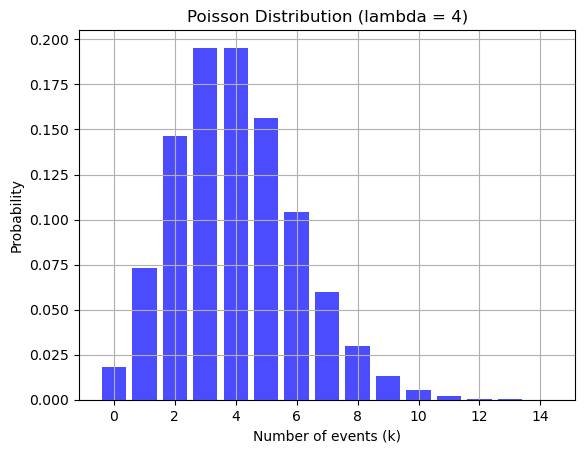

In [14]:
from scipy.stats import poisson

# Define the parameter (lambda, or average rate of occurrence)
lambda_rate = 4  # Average number of events in an interval

# Generate a range of values (k) for which we will calculate the probability
k_values = np.arange(0, 15)  # Values of k (number of events)

# Calculate the probability mass function (PMF) for each k
pmf_values = poisson.pmf(k_values, mu=lambda_rate)

# Plot the Poisson distribution
plt.bar(k_values, pmf_values, color='blue', alpha=0.7)
plt.title(f'Poisson Distribution (lambda = {lambda_rate})')
plt.xlabel('Number of events (k)')
plt.ylabel('Probability')
plt.grid(True)

### Ejemplo 1 de un GLM de Poisson homogéneo

Supongamos que estamos analizando la cantidad de "puntos calientes" de incendios forestales en diferentes celdas de una cuadrícula en una región forestal. Queremos modelar cómo ciertos factores ambientales afectan el número de puntos calientes en cada celda. Los factores considerados son la temperatura media de la celda, la humedad relativa y la densidad de vegetación (medida con el índice NDVI). Utilizaremos un modelo de Poisson para modelar el número de puntos calientes en función de estas covariables.

In [ ]:
# Librerías necesarias
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Crear un conjunto de datos simulado con pandas
data = {
    'temperatura': np.random.normal(30, 5, 100),  # Temperatura media en grados Celsius
    'humedad_relativa': np.random.uniform(20, 80, 100),  # Humedad relativa en porcentaje
    'ndvi': np.random.uniform(0.2, 0.9, 100),  # NDVI (densión de vegetación, entre 0 y 1)
    'puntos_calientes': np.random.poisson(3, 100)  # Número de puntos calientes detectados
}

# Convertir los datos en un DataFrame
df = pd.DataFrame(data)

# Describir los primeros datos del DataFrame
print(df.head())

   temperatura  humedad_relativa      ndvi  puntos_calientes
0    28.025748         64.409335  0.886141                 6
1    33.504193         68.247626  0.721042                 5
2    31.059733         60.840603  0.521779                 5
3    29.712336         79.902625  0.864358                 2
4    33.040100         41.638932  0.207528                 4


In [2]:
# Ajustar un modelo GLM de Poisson utilizando statsmodels
# La fórmula describe el modelo: puntos_calientes ~ temperatura + humedad_relativa + ndvi
modelo_poisson = smf.glm(formula="puntos_calientes ~ temperatura + humedad_relativa + ndvi", 
                         data=df, 
                         family=sm.families.Poisson()).fit()

# Resumen del modelo
print(modelo_poisson.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       puntos_calientes   No. Observations:                  100
Model:                            GLM   Df Residuals:                       96
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -194.78
Date:                Thu, 28 Nov 2024   Deviance:                       123.48
Time:                        13:03:18   Pearson chi2:                     114.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04642
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.1410      0.438  

- El coeficiente para "temperatura" indica el cambio en la tasa esperada de puntos calientes por unidad adicional de temperatura.
- El coeficiente para "humedad_relativa" indica cómo afecta la humedad relativa a la tasa de ocurrencia de puntos calientes. Si el coeficiente es negativo, una mayor humedad podría reducir la probabilidad de que ocurran puntos calientes.
- El coeficiente para "ndvi" describe el impacto de la densidad de vegetación sobre el número de puntos calientes.

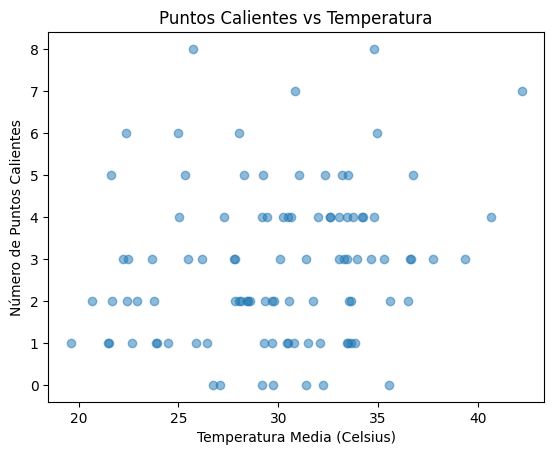

In [3]:
# Gráfico simple de puntos calientes vs temperatura para ilustrar la correlación
plt.scatter(df['temperatura'], df['puntos_calientes'], alpha=0.5)
plt.xlabel('Temperatura Media (Celsius)')
plt.ylabel('Número de Puntos Calientes')
plt.title('Puntos Calientes vs Temperatura')
plt.show()

Si los coeficientes de "temperatura" y "ndvi" son positivos, esto sugiere que a mayor temperatura y mayor densidad de vegetación, se incrementa la probabilidad de tener más puntos calientes. Si el coeficiente de "humedad_relativa" es negativo, indica que un incremento en la humedad relativa reduce el número esperado de puntos calientes.

### Ejemplo 2 de un GLM de Poisson homogéneo

Cualquier modelo estadístico que describa datos que ocurren en puntos localizados en el tiempo, como los tiempos de disparo de neuronas, se denomina modelo de proceso puntual temporal. Aquí, queremos construir un modelo estadístico que describa la distribución de probabilidad de los tiempos de espera entre los disparos para una neurona sin un estímulo de conducción explícito, en este caso, el modelo debería caracterizar cómo la distribución de los datos depende de las covariables de interés: la posición del ratón y la dirección del movimiento.

Un enfoque utilizado para modelar datos enteros positivos es un modelo de Poisson, en el que usamos un parámetro de tasa, $\lambda$, para definir la tasa esperada de disparos en cualquier intervalo de tiempo. Para los datos de interés aquí, ampliamos este concepto definiendo una tasa que varía en el tiempo como una función de un conjunto de covariables. Estas covariables son cualquier variable cuya influencia sobre la actividad de disparo deseemos explorar. Nuestras visualizaciones sugieren que las covariables útiles para nuestro modelo incluyen la posición del ratón y su dirección de movimiento.

Definamos algunos términos. Dejemos que $X(t)$ represente la posición del ratón en el tiempo $t$, y que $D(t)$ represente la dirección del movimiento; establecemos $D(t) = -1$ cuando $X(t)$ está disminuyendo o el ratón está detenido, y $D(t) = +1$ cuando $X(t)$ está aumentando. Dado que estas señales de posición y dirección cambian en función del tiempo, también lo hace la tasa de disparo. Escribimos $\lambda(t) = f(X(t), D(t))$, donde $\lambda(t)$ se llama la función de tasa de Poisson, y $f$ es una función que necesitamos para definir el modelo.

¿Qué función deberíamos usar para $f(X(t), D(t))$? Queremos algo que capture la relación entre las covariables y los disparos, y que sea fácil de interpretar. El proceso de encontrar un modelo o conjunto de modelos que sean más consistentes con los datos se llama identificación de modelos o selección de modelos. Típicamente, este es un proceso iterativo en el que proponemos una clase de modelos, encontramos el modelo particular en esa clase que mejor se ajusta a los datos, evaluamos la calidad de ese modelo y decidimos si refinar el modelo aún más o sacar conclusiones del ajuste del modelo. En la práctica, es una buena idea comenzar con estadísticas descriptivas y visualizaciones de la relación entre las covariables y los datos de disparo para seleccionar una clase de modelos de proceso puntual. Para los datos de tren de disparo de interés aquí, nuestras visualizaciones sugieren un modelo donde la dependencia del disparo en la posición tiene una forma de montículo (como en el histograma normalizado por ocupación) e incorpora la dirección. Comenzamos con un modelo demasiado simple para fines pedagógicos.

El siguiente es un modelo muy básico inspirado en la regresión lineal simple:

$$
\lambda(t) = \beta_0 + \beta_1 X(t)
$$

La idea de la regresión lineal es expresar una variable de respuesta en el tiempo $t$ en términos de variables predictoras, o covariables. Aquí, $\beta_0$ y $\beta_1$ son parámetros desconocidos utilizados para caracterizar una dependencia lineal entre la variable de respuesta $\lambda(t)$ y la covariable $X(t)$. $\beta_0$ representa la tasa de disparo esperada en $X(t) = 0$, y $\beta_1$ representa el cambio en la tasa de disparo por cada unidad de aumento en la posición. Este modelo inicial no incluye ninguna dependencia en la dirección de movimiento del ratón (es decir, no hay término $D(t)$).

La forma del modelo se parece a una regresión lineal estándar, lo cual es reconfortante porque existen métodos en Python para resolver este tipo de problemas. Sin embargo, los datos observados son eventos de disparo; en tiempo discreto, los datos son conteos de disparos. Una regresión lineal estándar asume que la distribución de los datos, dadas las covariables, es normal. Los conteos de disparos solo pueden tomar valores enteros no negativos, por lo que su distribución no puede ser normal. Cuando el número de conteos de disparos en cada intervalo de tiempo es muy grande, es posible que la distribución de los datos pueda aproximarse por una distribución normal, y en este caso, los métodos de regresión simple podrían funcionar. Pero para los datos de disparo de interés aquí, tenemos muy pocos disparos (0 o 1) en cada intervalo de tiempo de 1 ms, por lo que un ajuste de regresión simple no sería correcto.

En su lugar, debemos ajustar un modelo de regresión de Poisson a los datos. Si dejamos que $Y_i$ sea el número de disparos observados en el intervalo $i$, entonces bajo el modelo de regresión de Poisson, $Y_i$ tiene una distribución de Poisson con un parámetro de media igual a la variable de respuesta $\lambda(t)$ integrada sobre el intervalo $i$.

¿Cómo ajustamos el modelo de regresión de Poisson? Resulta que los modelos de regresión de Poisson de cierta forma se pueden ajustar de manera eficiente utilizando la teoría de modelos lineales generalizados (GLM). En Python, podemos ajustar este modelo utilizando el paquete `statsmodels`. Antes de aplicar esta función directamente a los datos, obtengamos una visión general de las entradas y salidas de la función. En Python, consideramos el modelo GLM del paquete `statsmodels`. Construiremos un modelo usando:

```python
GLM(Y, X_1, family(link()))
```

La primera entrada, $Y$, es un vector de los conteos de disparos en cada paso de tiempo. En este caso, $Y$ es el vector `spiketrain` que calculamos anteriormente. La segunda entrada, $X_1$, es una matriz de las covariables de las que depende el disparo. El tamaño de esta matriz es $n \times p$, donde $p$ es el número de covariables en el modelo, y $n$ es el número de observaciones. Dado que nuestro modelo está dado por $\lambda(t) = \beta_0 + \beta_1 X(t)$, añadiremos una columna de unos a la matriz de datos $X$, para que podamos ajustar la intersección $\beta_0$ a nuestros datos. Por lo tanto, $X_1$ es una matriz $n \times 2$, donde $n$ es el número de puntos de datos (177,761) que representan la posición del ratón a lo largo de la pista. La tercera entrada indica la distribución de los datos de conteo de disparos en $Y$. Para un modelo de regresión de Poisson de datos de conteo de disparos, utilizamos la familia de Poisson. De hecho, para la mayoría de los modelos de conteo de disparos neuronales ajustados utilizando GLM, incluso aquellos que no son procesos de Poisson, utilizamos la distribución de Poisson. La entrada `family` se caracteriza por una función de enlace entre la tasa de disparo y las covariables. Específicamente, si queremos ajustar un modelo de la forma $\lambda(t) = \exp(\beta_0 + \beta_1 X(t))$, entonces diríamos que la función $\log(\lambda(t)) = \beta_0 + \beta_1 X(t)$ es la función de enlace. Para el Modelo 1, esta es simplemente la función identidad. A continuación, mostramos una mejor manera de seleccionar esta función de enlace.

El atributo `params` de la función `fit` es un vector de números que representa las estimaciones de máxima verosimilitud de los parámetros del modelo, que para este ejemplo hemos etiquetado como $\beta_0$ y $\beta_1$. Usamos la notación con "sombrero" (hat) sobre un parámetro para representar su estimación. La estimación de máxima verosimilitud de $\beta_0$ se escribe como $\hat{\beta}_0$, y la estimación de máxima verosimilitud de $\beta_1$ se escribe como $\hat{\beta}_1$. Ahora, usemos esta función para ajustar los parámetros del Modelo 1 a los datos observados de ubicación y disparos.



In [16]:
import requests
url = 'https://github.com/Mark-Kramer/Case-Studies-Python/raw/master/matfiles/spikes-1.mat'
r = requests.get(url, allow_redirects=True)
open('spikles-1.mat', 'wb').write(r.content)

1761663

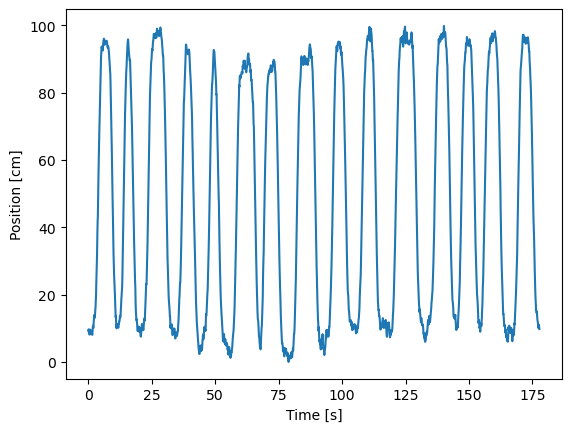

In [17]:
from scipy.io import loadmat 
import matplotlib.pyplot as plt

data = loadmat("spikles-1.mat")  
t = data['t'][:,0]              
X = data['X'][:,0]             
plt.plot(t, X)                     
plt.xlabel('Time [s]')
plt.ylabel('Position [cm]')
plt.show()

El gráfico muestra que la rata corre de un lado a otro de manera consistente, realizando aproximadamente 15 pasadas durante los 3 minutos de grabación. También observamos que la rata se mueve bastante rápido en cada pasada, pero pasa una gran cantidad de tiempo en ambos extremos de la pista (cerca de la posición 0 cm o 100 cm) antes de girar y continuar.

A continuación, nos gustaría graficar la actividad de disparo en relación con la trayectoria de movimiento de la rata. Sin embargo, no podemos simplemente graficar el vector X contra el vector spiketimes; estos vectores tienen longitudes diferentes. La longitud de X es la misma que la longitud de t, el número total de intervalos de tiempo de 1 ms en la grabación (177,761 intervalos de tiempo). La longitud de spiketimes es el número total de picos que ocurrieron durante la duración de la grabación: 220 picos. Por lo tanto, el primer paso para visualizar la actividad de disparo específica del lugar es usar spiketimes para crear un nuevo vector, del mismo tamaño que X, que indique si se produjo un pico en cada intervalo de tiempo. Llamaremos a este vector spiketrain, y contendrá un 1 para cada intervalo de tiempo donde ocurre un pico y un 0 para cada intervalo de tiempo que no tiene un pico.

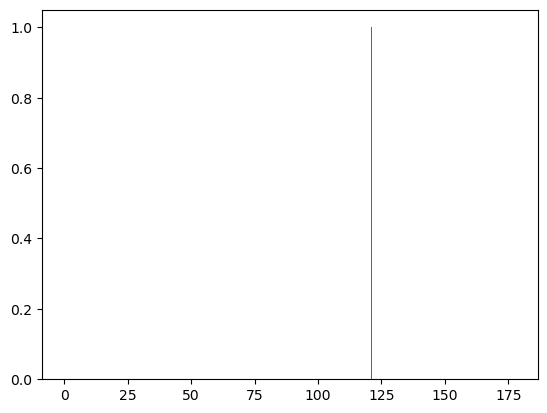

In [18]:
spiketimes = data['spiketimes']
n_bins = len(t)
# Histogram spikes into bins centered at times t:
spiketrain = plt.hist(spiketimes, bins = n_bins, range = (t[0], t[-1]))[0]

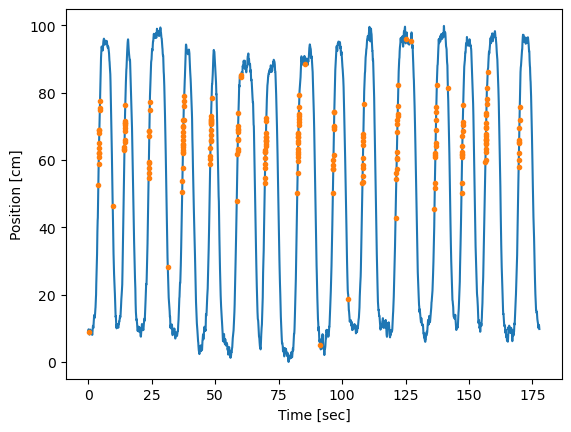

In [20]:
import numpy as np
spikeindex = np.where(spiketrain!=0)[0]     # Get the spike indices.
plt.plot(t, X)                               # Plot the position,
plt.plot(t[spikeindex], X[spikeindex], '.')  # ... and the spikes.  
plt.xlabel('Time [sec]')                     # Label the axes.
plt.ylabel('Position [cm]')
plt.show()

A partir de la figura anterior, está claro que la mayor parte de la actividad de picos ocurre cuando la rata está corriendo hacia arriba en la pista, en la dirección donde X está aumentando, en valores de X que van desde unos 50 cm hasta unos 80 cm. No vemos la misma actividad de picos en esta región cuando la rata está corriendo hacia abajo en la pista, en la dirección donde X está disminuyendo. Algunos picos ocurren en otras ubicaciones, pero estos parecen escasos en comparación con el disparo específico de lugar en esta región.

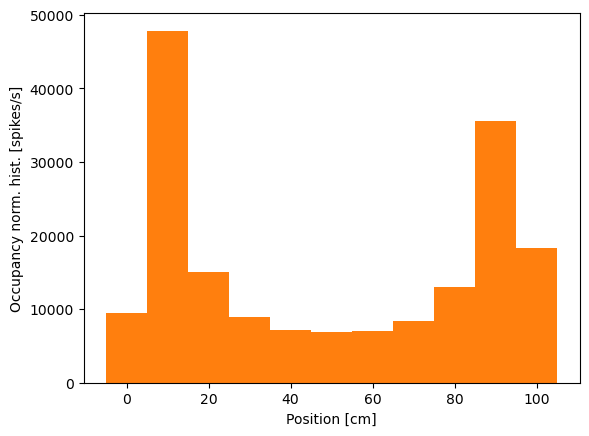

In [21]:
bin_edges = np.arange(-5, 106, 10)                              # Define spatial bins.
spikehist = plt.hist(X[spikeindex], bin_edges)[0]           # Histogram positions @ spikes.
occupancy = plt.hist(X, bin_edges)[0]*0.001                 # Convert occupancy to seconds.
plt.bar(np.linspace(0, 100, 11), spikehist/occupancy, width=8)  # Plot results as bars.
plt.xlabel('Position [cm]')                                      # Label the axes.
plt.ylabel('Occupancy norm. hist. [spikes/s]')
plt.show()

In [22]:
from statsmodels.genmod.families import Poisson
from statsmodels.genmod.families.links import identity

# Create a dataframe of predictors that includes X and a constant term
predictors = pd.DataFrame(data={'Intercept': np.ones_like(X), 'X': X})

# GLM model with Poisson family and identity link function
model1 = sm.GLM(spiketrain, predictors, family=Poisson(identity()))
model1_results = model1.fit() # Fit model to our data
b1 = model1_results.params
print('b1:')
print(b1)

/home/evaristizabalg/anaconda3/envs/ml/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The identity link alias is deprecated. Use Identity instead. The identity link alias will be removed after the 0.15.0 release.
  warnings.warn(
/home/evaristizabalg/anaconda3/envs/ml/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:308: DomainWarning: The identity link function does not respect the domain of the Poisson family.
  warnings.warn((f"The {type(family.link).__name__} link function "


b1:
Intercept   -0.000097
X            0.000027
dtype: float64


Inicialmente, es posible que notes que Python emite una advertencia en la línea de comandos indicando que este modelo—particularmente la función de enlace de identidad—puede ser inapropiado. Ignoraremos esta advertencia e intentaremos interpretar las estimaciones de los parámetros resultantes. El primero de estos valores es la estimación de máxima verosimilitud para $\beta_0$. Si creemos que este modelo es preciso, podríamos interpretar este parámetro como indicativo de que la tasa de disparo esperada en la posición $X(t) = 0$ es de $-0.097$ picos por milisegundo, o aproximadamente $-0.097$ picos por segundo, y que a medida que la rata se mueve en la dirección positiva, la tasa de disparo aumenta en $\beta_1$ picos por segundo por cada centímetro que la rata se mueve.

Este resultado debería levantar algunas señales de advertencia de inmediato. El hecho de que la tasa de disparo sea negativa indica que el modelo se vuelve ininterpretable para los valores observados de $X(t)$. Esto sugiere un problema importante con el Modelo 1: la tasa de disparo es negativa, lo que motiva cambios en la función de enlace del modelo. Para visualizar mejor la calidad de este modelo, podemos comparar la dependencia que define entre la posición y la tasa de disparo con el histograma normalizado por ocupación que calculamos anteriormente. En este caso, utilizamos las posiciones definidas por los intervalos del histograma y calculamos la tasa de disparo modelada en estos puntos.


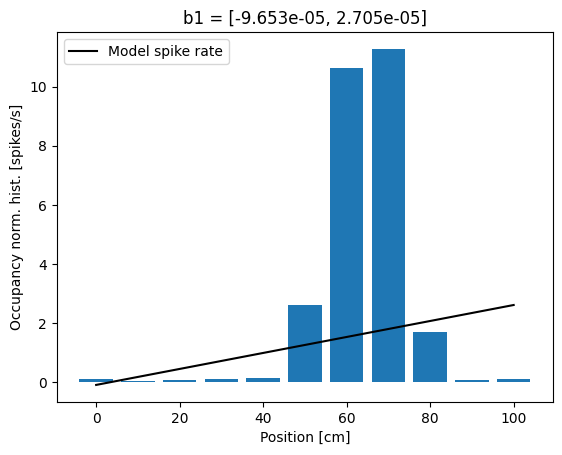

In [27]:
bins = np.linspace(0, 100, 11)
plt.bar(bins, spikehist/occupancy, width=8)    # Plot results as bars.
plt.plot(bins,(b1[0]+b1[1]*bins)*1000, 'k',
     label="Model spike rate")             # Plot model.
plt.xlabel('Position [cm]')                    # Label the axes.
plt.ylabel('Occupancy norm. hist. [spikes/s]')
plt.title("b1 = [{0[0]:.4}, {0[1]:.4}]".format(b1))
plt.legend()
plt.show()

Vemos que la tasa de disparo del modelo captura algunas características del disparo observado, por ejemplo, el hecho de que la tasa de disparo aumenta a medida que la rata se mueve desde la posición $x = 0$ hacia la posición $x = 60$. Pero el modelo no capta gran parte de la estructura, por ejemplo, el hecho de que la tasa de disparo no cambia linealmente con la posición y comienza a disminuir cuando la posición de la rata supera los $x = 70$. Esto sugiere un segundo problema con este modelo: la forma de la relación entre la posición y la tasa de disparo es incorrecta.

Concluimos que nuestra propuesta inicial, el Modelo 1, no representa bien los datos. Por lo tanto, refinemos el modelo para abordar los problemas identificados. Primero, elijamos una función de enlace que sea más apropiada para el modelado de procesos puntuales. Nos gustaría una función que asegure que la función de tasa sea no negativa y que sea fácil de ajustar. La teoría del modelado lineal generalizado sugiere una función en particular: el enlace logarítmico. Establecemos que el logaritmo de la tasa de disparo sea una función lineal de las covariables. Si mantenemos la posición como la única covariable, esto conduce a un modelo de la forma:

$$
\log(\lambda(t)) = \beta_0 + \beta_1 X(t)
$$

o, de manera equivalente,

$$
\lambda(t) = \exp(\beta_0 + \beta_1 X(t))
$$

Esta función de enlace se llama el enlace canónico para datos de Poisson. Tiene una serie de propiedades atractivas. Como se deseaba, asegura que la función de tasa sea positiva.

**P:** Considera la expresión para $\lambda(t)$ arriba. ¿Por qué $\lambda(t)$ debe ser siempre positiva?

La elección de un enlace logarítmico también asegura que la verosimilitud de los datos sea cóncava con respecto a los parámetros del modelo. Esto significa que la verosimilitud solo tiene un valor máximo local, que es la estimación de máxima verosimilitud (ML). También se puede demostrar que, en muchos casos, los estimadores de los parámetros serán asintóticamente normales, lo que nos permitirá construir intervalos de confianza y hacer declaraciones de significancia sobre ellos \[Kass, Eden & Brown, 2014\].

Para ajustar el Modelo 2 en Python, usamos el mismo modelo que antes pero reemplazamos la función de enlace con $\log$:

In [29]:
model2 = sm.GLM(spiketrain, predictors, family=Poisson()) # GLM model with Poisson family and log link function
model2_results = model2.fit() # Fit model to our data
b2 = model2_results.params    # Get the predicted coefficient vector

De hecho, si omitimos el nombre de la función de enlace en la rutina `sm.GLM`, esta usará automáticamente el enlace canónico para la distribución seleccionada. Dado que el enlace logarítmico es canónico para datos de Poisson, simplemente podemos ejecutar los comandos:

In [30]:
model2 = sm.GLM(spiketrain, predictors, family=Poisson())  # GLM model with Poisson family, omitting link function
model2_results = model2.fit()  # Fit model to our data
b2 = model2_results.params     # Get the predicted coefficient vector
print(b2)

Intercept   -7.438887
X            0.012943
dtype: float64


Esta vez, encontramos que Python no emite una advertencia sobre la posible inapropiedad de la función de enlace. La inspección de los valores estimados de los parámetros revela $b_2 = [-7.43888719, 0.01294342]$. Estos valores son marcadamente diferentes de los valores de parámetros $b_1$ encontrados usando el Modelo 1. La razón de esta diferencia es que la forma del modelo tiene un impacto importante en la interpretación de los valores de los parámetros. A continuación, discutimos la interpretación de estos valores de los parámetros en detalle.

Examinemos el ajuste del modelo más de cerca. Cuando $x = 0$, la tasa de disparo bajo el Modelo 2 es:

$$
\begin{align}
\lambda(t) &= \exp(\beta_0 + \beta_1 \times 0) \\
           &= \exp(\beta_0) \\
           &= 0.0006\text{ spikes/ms} \\
           &= 0.6 \text{ spikes/s}
\end{align}
$$

donde hemos utilizado el valor $b_2[0]$. Si el ratón se mueve de la posición $x = 0$ a $x = 1$, la tasa de disparo se convierte en:

$$
\begin{align}\lambda(t) &= \exp(\beta_0 + \beta_1 × 1) \\
  &= \exp(\beta_0 + \beta_1)\\
  &= \exp(\beta_0)\exp(\beta_1)\\
  &= 1.013 \exp(\beta_0),\end{align}
$$

donde hemos utilizado el valor $b_2[1]$. Es decir, un aumento de 1 cm en la posición incrementa la tasa de disparo en un 1.3%. Debido a la función de enlace, la posición ahora tiene un efecto multiplicativo en lugar de aditivo sobre la tasa de disparo. En lugar de sumar a la tasa de disparo, cada aumento de posición conduce a una modulación multiplicativa de la tasa de disparo, con un incremento de aproximadamente un 1% por cm. Veamos cómo se ve este modelo comparándolo con el histograma normalizado por ocupación de los datos.

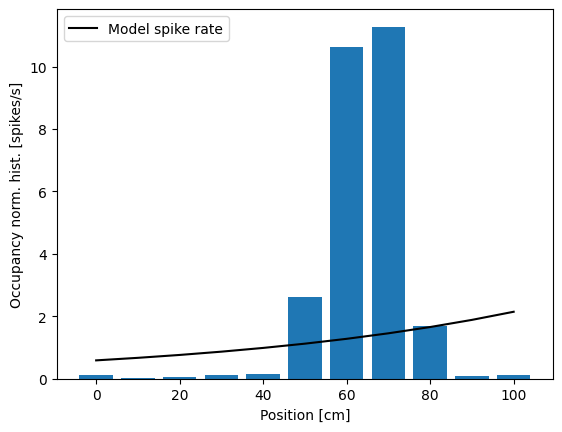

In [32]:
plt.bar(bins, spikehist/occupancy, width=8)    # Plot results as bars.
plt.plot(bins, np.exp(b2[0] + b2[1] * bins) * 1000, 'k',
     label='Model spike rate')             # Plot model.
plt.xlabel('Position [cm]')                    # Label the axes.
plt.ylabel('Occupancy norm. hist. [spikes/s]')
plt.legend()
plt.show()

La inspección visual sugiere que hemos resuelto un problema: la tasa de disparo ya no es negativa en ningún lugar. Sin embargo, el ajuste del modelo aún no concuerda con la estructura observada en el histograma normalizado por ocupación. Hemos mejorado la función de enlace, pero usar solo la posición como covariable lleva a una tasa que es una función exponencial de la posición del ratón.

Hay muchas variables que podríamos considerar agregar a este modelo, pero ¿qué variables podríamos añadir para capturar mejor la dependencia entre la tasa de disparo y la posición, en particular? Una idea podría ser incluir términos no lineales, como el cuadrado del valor de la posición.

## Modelo Binomial Negativo

La regresión binomial negativa es un modelo de regresión utilizado para datos de conteo donde la varianza excede la media, un fenómeno conocido como sobredispersión.

Es una extensión de la regresión de Poisson, que relaja el supuesto de igualdad entre media y varianza, permitiendo así un modelado más realista en contextos donde los eventos presentan alta variabilidad.

$yᵢ ~ NegBin(μᵢ, θ)$

donde:

* 𝜇𝑖 es la media esperada para la observación 𝑖

* 𝜃 es el parámetro de dispersión

La función de enlace es:

$log(μᵢ) = β₀ + β₁x₁ᵢ + β₂x₂ᵢ + ... + βₚxₚᵢ$

La varianza bajo la binomial negativa es:

$Var(yᵢ) = μᵢ + μᵢ² / θ$

La dsitribución Binomial y la Binomial negativa se relacionan en ambas derivan de ensayos Bernoulli, el cual es un experimento con dos resultados: éxito (1) o fracaso (0), con probabilidad 𝑝.

* Distribución binomial: cuenta cuántos éxitos hay en 𝑛 ensayos con probabilidad fija 𝑝.

* Distribución binomial negativa: cuenta cuántos fracasos ocurren antes de alcanzar un número fijo de éxitos 𝑟 (o viceversa, según la parametrización).

Ambas son distribuciones de conteo discreto y ambas modelan variables aleatorias enteras y no negativas.

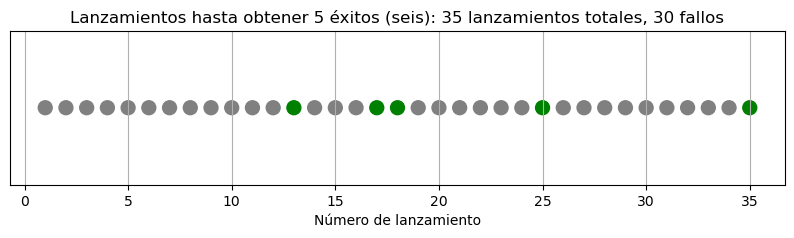

In [26]:

# Parámetros del experimento
p = 1/6  # Probabilidad de éxito (sacar un 6)
r = 5    # Número de éxitos deseados

np.random.seed(42)

# Simular lanzamientos hasta obtener r éxitos
lanzamientos = []
exitos = 0

while exitos < r:
    dado = np.random.randint(1, 7)
    lanzamientos.append(dado)
    if dado == 6:
        exitos += 1

# Convertir a array
lanzamientos = np.array(lanzamientos)
n_lanzamientos = len(lanzamientos)
fallos = n_lanzamientos - r

# Visualizar la secuencia
plt.figure(figsize=(10, 2))
colors = ['green' if x == 6 else 'gray' for x in lanzamientos]
plt.scatter(range(1, n_lanzamientos + 1), [1]*n_lanzamientos, c=colors, s=100)
plt.yticks([])
plt.xlabel("Número de lanzamiento")
plt.title(f"Lanzamientos hasta obtener {r} éxitos (seis): {n_lanzamientos} lanzamientos totales, {fallos} fallos")
plt.grid(True, axis='x')
plt.show()


Aquí tienes la simulación visual de los lanzamientos de dado:

* Los puntos verdes representan los éxitos (donde salió un 6).

* Los grises son fallos (cualquier otro número).

En este experimento, se necesitaron 21 lanzamientos para obtener 5 veces un 6, con 16 fallos intercalados. Esto ilustra perfectamente el concepto de la distribución binomial negativa: modelar cuántos ensayos (o fracasos) se requieren antes de alcanzar un número fijo de éxitos no consecutivos.

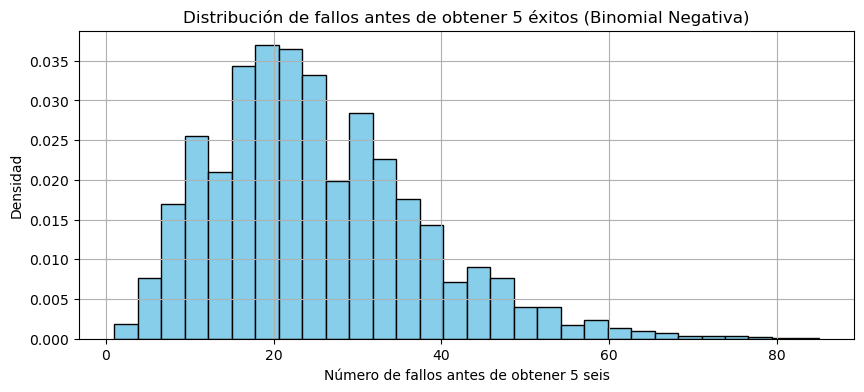

In [27]:
# Repetir el experimento muchas veces
n_repeticiones = 10000
resultados = []

for _ in range(n_repeticiones):
    exitos = 0
    lanzamientos = 0
    while exitos < r:
        dado = np.random.randint(1, 7)
        lanzamientos += 1
        if dado == 6:
            exitos += 1
    fallos = lanzamientos - r
    resultados.append(fallos)

# Visualizar la distribución de fallos hasta obtener r éxitos
plt.figure(figsize=(10, 4))
plt.hist(resultados, bins=30, color='skyblue', edgecolor='black', density=True)
plt.title(f"Distribución de fallos antes de obtener {r} éxitos (Binomial Negativa)")
plt.xlabel("Número de fallos antes de obtener 5 seis")
plt.ylabel("Densidad")
plt.grid(True)
plt.show()


Aquí tienes la distribución empírica del número de fallos antes de obtener 5 éxitos (es decir, 5 veces un 6):

Tiene forma asimétrica (cola larga a la derecha), característica de la binomial negativa.

En promedio, se necesitan más de 20 lanzamientos (fallos + éxitos) para lograrlo, porque el 6 solo tiene una probabilidad de 1/6.

Esto muestra cómo la binomial negativa captura la variabilidad natural en procesos con baja probabilidad de éxito y repeticiones aleatorias.

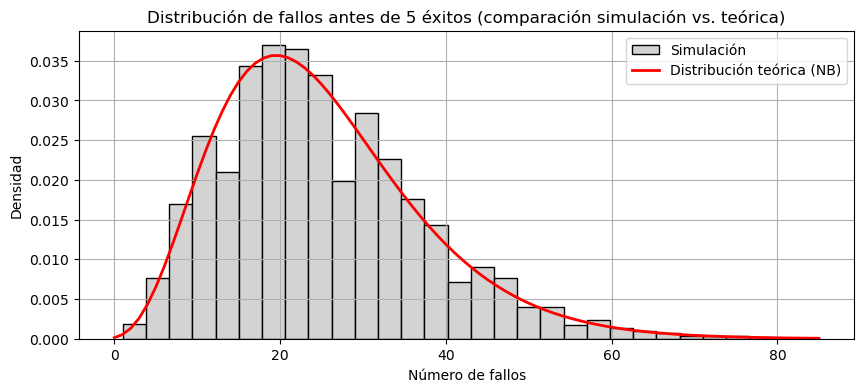

In [28]:
from scipy.stats import nbinom

# Valores posibles de fallos
x_vals = np.arange(0, max(resultados)+1)

# Parámetros de la binomial negativa:
# r = número de éxitos deseados
# p = probabilidad de éxito por ensayo
# En scipy, nbinom(k; r, p) da la probabilidad de k fallos antes de r éxitos
pmf_vals = nbinom.pmf(x_vals, n=r, p=p)

# Gráfico comparativo
plt.figure(figsize=(10, 4))
plt.hist(resultados, bins=30, color='lightgray', edgecolor='black', density=True, label="Simulación")
plt.plot(x_vals, pmf_vals, 'r-', lw=2, label="Distribución teórica (NB)")
plt.title(f"Distribución de fallos antes de {r} éxitos (comparación simulación vs. teórica)")
plt.xlabel("Número de fallos")
plt.ylabel("Densidad")
plt.legend()
plt.grid(True)
plt.show()


Aquí puedes ver la comparación entre la simulación y la distribución teórica binomial negativa:

La histograma gris representa los resultados de nuestras 10,000 simulaciones.

La línea roja es la función de masa de probabilidad (PMF) teórica para la distribución binomial negativa con 𝑟=5, 𝑝=1/6.

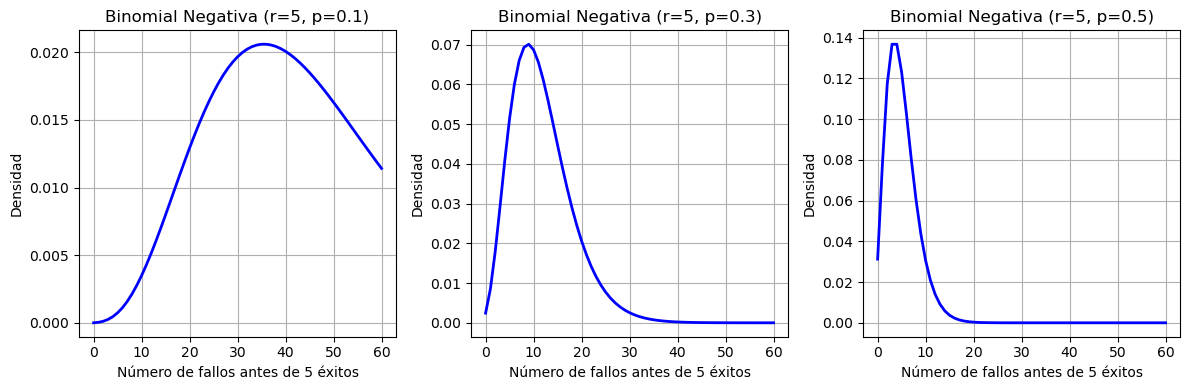

In [29]:
# Repetir el análisis con distintos valores de p y r fijos (5)
ps = [0.1, 0.3, 0.5]
r = 5
max_fallos = 60

plt.figure(figsize=(12, 4))
for i, p_val in enumerate(ps):
    x_vals = np.arange(0, max_fallos + 1)
    pmf_vals = nbinom.pmf(x_vals, n=r, p=p_val)

    plt.subplot(1, 3, i + 1)
    plt.plot(x_vals, pmf_vals, 'b-', lw=2)
    plt.title(f"Binomial Negativa (r={r}, p={p_val})")
    plt.xlabel("Número de fallos antes de 5 éxitos")
    plt.ylabel("Densidad")
    plt.grid(True)

plt.tight_layout()
plt.show()


Aquí puedes ver cómo cambia la forma de la distribución binomial negativa al variar la probabilidad de éxito 𝑝: 

* Cuando 𝑝=0.1 (éxito poco probable), la distribución es más dispersa, con una cola muy larga: se necesitan muchos intentos.

🔹 Cuando 𝑝=0.3, la distribución se vuelve más concentrada: los 5 éxitos ocurren con menos fallos.

🔹 Cuando 𝑝=0.5, la distribución se vuelve aún más compacta: los éxitos son frecuentes.

Esto muestra cómo la probabilidad de éxito controla la forma y la dispersión de la binomial negativa.

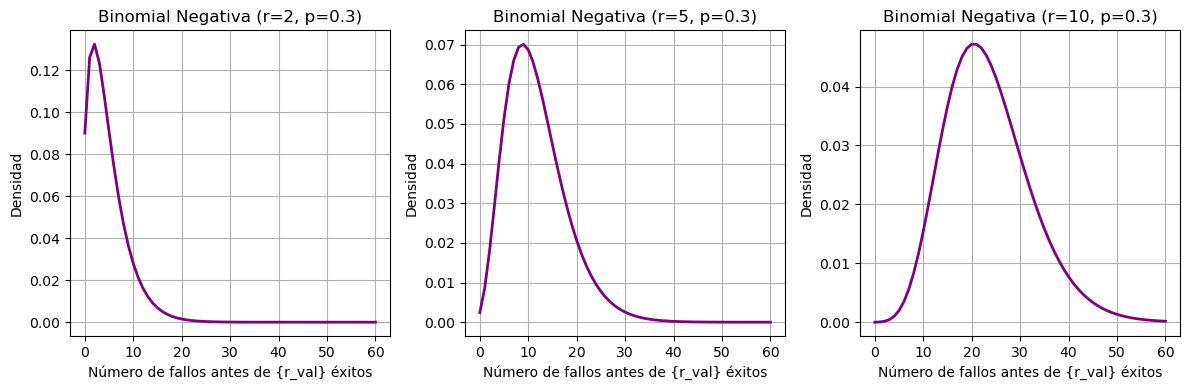

In [9]:
# Mantener p fijo y variar r (número de éxitos deseados)
p_fixed = 0.3
rs = [2, 5, 10]
max_fallos = 60

plt.figure(figsize=(12, 4))
for i, r_val in enumerate(rs):
    x_vals = np.arange(0, max_fallos + 1)
    pmf_vals = nbinom.pmf(x_vals, n=r_val, p=p_fixed)

    plt.subplot(1, 3, i + 1)
    plt.plot(x_vals, pmf_vals, 'purple', lw=2)
    plt.title(f"Binomial Negativa (r={r_val}, p={p_fixed})")
    plt.xlabel("Número de fallos antes de {r_val} éxitos")
    plt.ylabel("Densidad")
    plt.grid(True)

plt.tight_layout()
plt.show()


Aquí puedes ver cómo afecta el número de éxitos deseado 𝑟 a la forma de la distribución binomial negativa, manteniendo la probabilidad de éxito fija en 
𝑝=0.3:

✅ Cuando 𝑟=2: la distribución es más estrecha y sesgada, porque solo necesitas pocos éxitos → menos variabilidad.

✅ Cuando 𝑟=5: la curva se ensancha y desplaza hacia la derecha.

✅ Cuando 𝑟=10: se vuelve aún más simétrica y extendida: necesitas más éxitos, así que se acumulan más fallos.

En resumen: A mayor 𝑟, más ensayos y mayor dispersión. A menor 𝑝, mayor varianza.

### Ejemplo 

In [30]:
# Simulación de datos de conteo con sobredispersión
np.random.seed(42)
n = 200
pendiente = np.random.uniform(0, 90, size=n)
elevacion = np.random.uniform(500, 2500, size=n)

# Coeficientes del modelo
beta_0 = -2.0
beta_1 = 0.04   # efecto de pendiente
beta_2 = 0.001  # efecto de elevación
theta = 1.5     # parámetro de dispersión (más dispersión)

# Simular área (por ejemplo, en km²)
area_km2 = np.random.uniform(1, 10, size=n)  # áreas entre 1 y 10 km²
log_area = np.log(area_km2)  # offset en escala log

# Media esperada
mu = np.exp(beta_0 + beta_1 * pendiente + beta_2 * elevacion + log_area)

# Generar datos de respuesta
p = theta / (theta + mu)
y = nbinom.rvs(theta, p)

# DataFrame
df = pd.DataFrame({
    "pendiente": pendiente,
    "elevacion": elevacion,
    "area_km2" : area_km2,
    "log_area" : log_area,
    "y": y
})

In [31]:
# Ajustar modelo binomial negativa
X = sm.add_constant(df[["pendiente", "elevacion"]])
model_nb = sm.GLM(df["y"], X,
                         family=sm.families.NegativeBinomial(),
                         offset=df["log_area"])
results_nb = model_nb.fit()
df["mu_pred"] = results_nb.predict(X, offset=df["log_area"])

/home/evaristizabalg/anaconda3/envs/ml/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


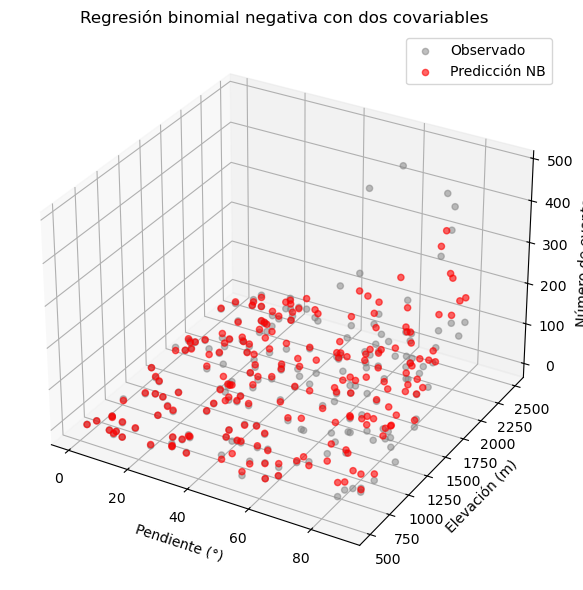

In [32]:
# Visualización en 3D (opcional)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["pendiente"], df["elevacion"], df["y"], c='gray', alpha=0.5, label="Observado")
ax.scatter(df["pendiente"], df["elevacion"], df["mu_pred"], c='red', alpha=0.6, label="Predicción NB")
ax.set_xlabel("Pendiente (°)")
ax.set_ylabel("Elevación (m)")
ax.set_zlabel("Número de eventos")
ax.set_title("Regresión binomial negativa con dos covariables")
ax.legend()
plt.tight_layout()
plt.show()

## Modelo de Ceros Inflados

Los modelos de conteo clásicos como Poisson o binomial negativa suponen que los ceros ocurren como parte del proceso natural. Pero en muchos contextos reales (como deslizamientos), hay más ceros de los que esos modelos predicen, por ejemplo:

* Celdas donde realmente no hay condiciones físicas para deslizamientos (ceros estructurales).

* Celdas donde sí podría haber, pero no ocurrieron durante el periodo observado (ceros aleatorios).

En esos casos, usamos modelos inflados en ceros, que asumen que algunos ceros provienen de un proceso separado.

El modelo ZINB combina:

* Una parte binaria (modelo logístico) que predice la probabilidad de estar en el grupo "siempre cero".

* Una parte de conteo (binomial negativa) que modela el número de eventos si no está en el grupo siempre cero.

### Ejemplo

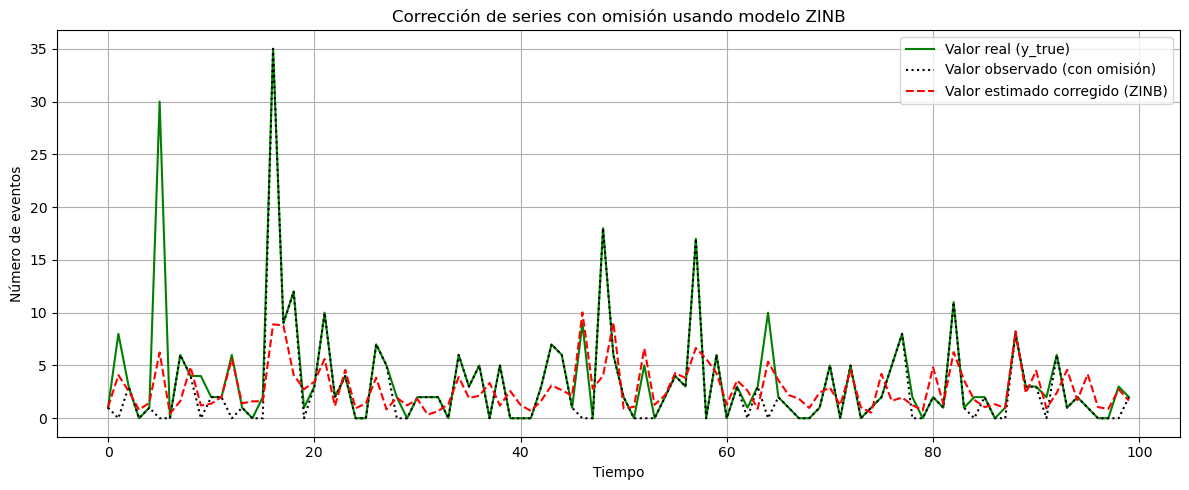

In [33]:
from statsmodels.discrete.count_model import ZeroInflatedNegativeBinomialP

# 1. Simular datos reales
np.random.seed(123)
n = 100
tiempo = np.arange(n)  # ejemplo: 100 años o meses
x = np.random.normal(0, 1, n)  # predictor temporal (puede ser SPI, pendiente promedio, etc.)

# Modelo real
beta_0 = 1.0
beta_1 = 0.8
theta = 2.0
mu = np.exp(beta_0 + beta_1 * x)
from scipy.stats import nbinom
p = theta / (theta + mu)
r = theta
y_true = nbinom.rvs(r, p)

# 2. Introducir falsos ceros (subregistro): 25% de los y_true > 0 se vuelven 0
y_obs = y_true.copy()
mask = (y_true > 0) & (np.random.rand(n) < 0.25)
y_obs[mask] = 0

# 3. Preparar datos
df = pd.DataFrame({
    "tiempo": tiempo,
    "x": x,
    "y_obs": y_obs,
    "y_true": y_true,
    "falso_cero": (y_obs == 0) & (y_true > 0)
})

# 4. Ajustar modelo ZINB (modelo de corrección)
exog = sm.add_constant(df["x"])  # incluye intercepto
zinb_model = ZeroInflatedNegativeBinomialP(endog=df["y_obs"], exog=exog, exog_infl=exog, inflation="logit")
zinb_result = zinb_model.fit(method="bfgs", maxiter=100, disp=False)

# 5. Estimar media esperada corregida
df["mu_pred"] = zinb_result.predict()

# 6. Visualizar serie original, observada y corregida
plt.figure(figsize=(12, 5))
plt.plot(df["tiempo"], df["y_true"], label="Valor real (y_true)", color="green")
plt.plot(df["tiempo"], df["y_obs"], label="Valor observado (con omisión)", color="black", linestyle="dotted")
plt.plot(df["tiempo"], df["mu_pred"], label="Valor estimado corregido (ZINB)", color="red", linestyle="--")
plt.xlabel("Tiempo")
plt.ylabel("Número de eventos")
plt.title("Corrección de series con omisión usando modelo ZINB")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
